In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

# Total cross section: proton - proton

Data extracted from the DPG website (https://pdg.lbl.gov/2021/hadronic-xsections/hadron.html) to be cited as

P.A. Zyla et al. (Particle Data Group), Prog. Theor. Exp. Phys. 2020, 083C01 (2020) and 2021 update.

and the fit function and parameters taken from the article (https://iopscience.iop.org/article/10.1088/1674-1137/40/10/100001) to be cited as

C. Patrignani 2016 Chinese Phys. C 40 100001

In [2]:
with open('rpp2021-pp_total.dat') as opened_file :
# with open('rpp2021-pbarp_total.dat') as opened_file :
    data = opened_file.readlines()

In [3]:
plab = np.array([float(vals.split()[1]) for vals in data[11:]])
plab_min = np.array([float(vals.split()[2]) for vals in data[11:]])
plab_max = np.array([float(vals.split()[3]) for vals in data[11:]])
s = np.array([float(vals.split()[4]) for vals in data[11:]])
sp = np.array([float(vals.split()[5]) for vals in data[11:]])
sm = np.array([float(vals.split()[6]) for vals in data[11:]])

In [6]:
def sigma_pp(plab):
    """Cross section for proton-proton interactions based on the PDG fit, as
    a function of the laboratory momentum plab in GeV.

    Reference: C. Patrignani 2016 Chinese Phys. C 40 100001
    """
    mp = 0.938272 # GeV
    M = 2.1206 # GeV
    H = 0.272 # mb
    P, R1, R2 = 34.41, 13.07, 7.394 # in mb
    eta1, eta2 = 0.4473, 0.5486 # dimenssionless

    ecm2 = 2*(mp**2 + mp*np.sqrt(plab**2 + mp**2)) # GeV
    sab = (2*mp + M)**2 # GeV

    return H * np.log(ecm2/sab)**2 + P + R1*(ecm2/sab)**-eta1 - R2*(ecm2/sab)**-eta2

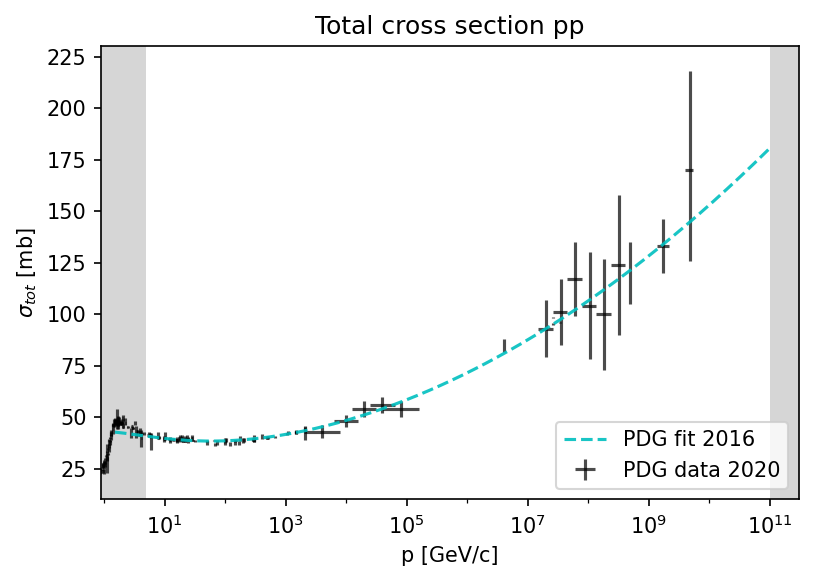

In [7]:

plab2 = np.logspace(.18, 11, len(plab))
sfit = sigma_pp(plab2)
plt.subplots(dpi=150)
plab = np.array(plab)
# plt.scatter(plab, s, label='PDG data 2020', s=3)
plt.errorbar(plab, s, np.vstack((sm, sp)), xerr=np.vstack((plab - plab_min, - plab + plab_max)), ls='', label='PDG data 2020', c='k', alpha=.7)

plt.semilogx(plab2, sfit, 'C1', label='PDG fit 2016', c='c', alpha=.9, ls='--')

# excluded regions
plt.axvspan(.01, 5, facecolor=(.2,)*4)
plt.axvspan(1e11, 3e11, facecolor=(.2,)*4)

# touching up plot
plt.xlim(.9, 3e11)
plt.ylim(10, 230)
plt.gca().xaxis.set_minor_locator(ticker.LogLocator(base=10, numticks=13))
plt.tick_params(which='minor', labelcolor=(0,)*4)

plt.xlabel('p [GeV/c]')
plt.ylabel('$\sigma_{tot}$ [mb]')
plt.title('Total cross section pp')
plt.legend(loc='lower right')

plt.savefig('cross_section.pdf')